<div style="border:solid purple 2px; padding: 20px"> 

**Привет!**

Меня зовут Мария Новожилова и я буду делать ревью проектной работы по статистическому анализу данных. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> Так я выделяю те комментарии, на которые нужно обратить внимание в первую очередь. После их доработки проект будет принят. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Зеленым цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера "пожелания":</b> Оранжевым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).</div>
    
Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> Александр, начну сразу с красного комментария. В проекте очень не хватает хотя бы краткого введения (как называется проект, какие у него цели и задачи, контекст) и структуры. 
 
Структуру удобно задавать с помощью ячеек Markdown и заголовков. Вот так:
    
    
# Заголовок
 Подзаголовок
    
 Следующий подзаголовок
    
    
Прочитать подробнее про оформление проектов можно тут:
    https://www.notion.so/e56b058e7f1a438e9c1247451daf20f8
 <div class="alert alert-info"> <b>Комментарий студента:</b> Описание проекта и заголовки добавлены           
     P.S. Очень долгая проверка проекта. Я ничего уже не помню, чем я здесь занимался, от слова совсем(. Надо сдавать сборный проект. Очень хотел разобраться , куда же подевались пользователи, но у меня не выходит. Тут либо завершать учебу, либо двигаться дальше. Много материала, много что запомнилось хорошо, некоторые вещи не помню и не понимаю( Округлил длительность звонков, интернет до ГБ. Построил гистограммы на 1 графике, добавил гипотезы  </div>

<div class="alert alert-success">
<b>2 Комментарий ревьюера ✔️:</b> Александр, да, я понимаю, о чем ты говоришь. Ситуация со скоростью проверки уже улучшается, следующие проекты должны пойти быстрее. И я понимаю, что спустя две недели уже сложно вспомнить, что тут и как. В рамках моего ревью я постараюсь помочь с непонятными моментами.

# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')
display (calls.head(20))
display (internet.head(20))
display (messages.head(20))
display (tariffs.head(20))
display (users.head(20))
calls.info()
internet.info()
messages.info()
tariffs.info()
users.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 co

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Библиотеки и данные успешно загружены</div>


<div class="alert alert-info">
<font color='black'> <b> По открытым таблицам с данными можно сделать следующие выводы:  
   Столбцы с датами требует обработки. В таблице "users" имеются пропуски в столбце "churn_date". После преобразования столбца заменил пропуски в нем на последнее по хронологии время (как описано в задании, если пропуск,значит на текущую дату пользователь не ушел с тарифа) </font> <b> 

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Рада промежуточным выводам и комментариям! Это упрощает проверку работы и внесение исправлений. 

По сути комментария: даты действительно требуют обработки, а вот заполнять пропуски в churn_date для целей проекта не требуется.


## Подготовка данных

In [38]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%dT%H:%M:%S')
calls['duration'] = calls['duration'].replace(0, 1)
calls['duration']= np.ceil(calls['duration'])
calls['duration']= calls['duration'].astype('int')
calls['day_weekday'] = calls['call_date'].dt.weekday
calls['day_month'] = calls['call_date'].dt.month
calls['day_year'] = calls['call_date'].dt.year
display (calls.head())
calls.info()
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%dT%H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%dT%H:%M:%S')
users['churn_date'] = users['churn_date'].fillna(users['churn_date'].max())
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%dT%H:%M:%S')
messages['day_weekday'] = messages['message_date'].dt.weekday
messages['day_month'] = messages['message_date'].dt.month
messages['day_year'] = messages['message_date'].dt.year
display (messages.head())
messages.info()
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%dT%H:%M:%S')
internet['day_weekday'] = internet['session_date'].dt.weekday
internet['day_month'] = internet['session_date'].dt.month
internet['day_year'] = internet['session_date'].dt.year


,id,call_date,duration,user_id,day_weekday,day_month,day_year
0,1000_0,2018-07-25,1,1000,2,7,2018
1,1000_1,2018-08-17,1,1000,4,8,2018
2,1000_2,2018-06-11,3,1000,0,6,2018
3,1000_3,2018-09-21,14,1000,4,9,2018
4,1000_4,2018-12-15,6,1000,5,12,2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           202607 non-null  object        
 1   call_date    202607 non-null  datetime64[ns]
 2   duration     202607 non-null  int64         
 3   user_id      202607 non-null  int64         
 4   day_weekday  202607 non-null  int64         
 5   day_month    202607 non-null  int64         
 6   day_year     202607 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 10.8+ MB


,id,message_date,user_id,day_weekday,day_month,day_year
0,1000_0,2018-06-27,1000,2,6,2018
1,1000_1,2018-10-08,1000,0,10,2018
2,1000_2,2018-08-04,1000,5,8,2018
3,1000_3,2018-06-16,1000,5,6,2018
4,1000_4,2018-12-05,1000,2,12,2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   day_weekday   123036 non-null  int64         
 4   day_month     123036 non-null  int64         
 5   day_year      123036 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 5.6+ MB


<div class="alert alert-info">
<font color='black'> <b> Объединим 2 таблицы по общей колонке "тариф", предварительно передав ей единое название для обеих таблиц </font> <b> 

In [3]:
users.rename(columns = {'tariff':'tariff_name'}, inplace = True) 
display (users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2018-12-30,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2018-12-30,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2018-12-30,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2018-12-30,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users_tariffs=users.merge(tariffs, on = ['tariff_name'], how = 'left')
display (users_tariffs.head())


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,2018-12-30,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,2018-12-30,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,2018-12-30,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,2018-12-30,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1


<div class="alert alert-info">
<font color='black'> <b> Объединим следующие 2 таблицы "user_tariffs" и  "calls" по общей колонке "user_id"</font> <b> 

In [5]:
users_tariffs_calls=users_tariffs.merge(calls, on = ['user_id'], how = 'left')
display (users_tariffs_calls)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,id,call_date,duration,day_weekday,day_month,day_year
0,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,1000_0,2018-07-25,1.0,2.0,7.0,2018.0
1,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,1000_1,2018-08-17,1.0,4.0,8.0,2018.0
2,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,1000_2,2018-06-11,3.0,0.0,6.0,2018.0
3,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,1000_3,2018-09-21,14.0,4.0,9.0,2018.0
4,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,1000_4,2018-12-15,6.0,5.0,12.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202610,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,1499_215,2018-12-26,1.0,2.0,12.0,2018.0
202611,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,1499_216,2018-10-18,19.0,3.0,10.0,2018.0
202612,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,1499_217,2018-11-10,11.0,5.0,11.0,2018.0
202613,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,1499_218,2018-10-06,5.0,5.0,10.0,2018.0


<div class="alert alert-info">
<font color='black'> <b> Сделаем сводную таблицу для расчета количества звонков и их суммарной длительности </font> <b>

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> По условиям тарифа каждый звонок округляется до целой минуты, поэтому общая продолжительность звонков в месяц должна получиться больше.
 <div class="alert alert-info"> <b>Комментарий студента:</b> Заменил звонки с нулевой продолжительностью на звонки с минутной продолжительностью и округлил до ближайшего верхнего числа</div>


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично!

Насчет замены нулевых звонков на минутные, кстати, спорный момент. Кто-то трактует их как пропущенные и округляет только ненулевые звонки. Но это в любом случае не ошибка.</div>

In [6]:
month_calls = users_tariffs_calls.pivot_table(index = ['user_id', 'age', 'city', 'day_month', 'tariff_name', 'rub_monthly_fee', 'minutes_included', 'messages_included', 'rub_per_message', 'rub_per_gb', 'rub_per_minute', 'mb_per_month_included'], values = ['duration'], aggfunc=['count', 'sum'])
display(month_calls) 


count  \
                                                                                                                                                                 duration   
user_id age city        day_month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included            
1000    52  Краснодар   5.0       ultra       1950            3000             1000              1               150        1              30720                       22   
                        6.0       ultra       1950            3000             1000              1               150        1              30720                       43   
                        7.0       ultra       1950            3000             1000              1               150        1              30720                       47   
                        8.0       ultra       1950            3000             1000              1               150        1              30720                       52   
                        9.0       ultra       1950            3000             1000              1               150        1              30720                       58   
...                                                                                                                                                                   ...   
1498    68  Владикавказ 10.0      smart       550             500              50                3               200        3              15360                       41   
1499    35  Пермь       9.0       smart       550             500              50                3               200        3              15360                        9   
                        10.0      smart       550             500              50                3               200        3              15360                       68   
                        11.0      smart       550             500              50                3               200        3              15360                       74   
                        12.0      smart       550             500              50                3               200        3              15360                       69   

                                                                                                                                                                      sum  
                                                                                                                                                                 duration  
user_id age city        day_month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included           
1000    52  Краснодар   5.0       ultra       1950            3000             1000              1               150        1              30720                    164.0  
                        6.0       ultra       1950            3000             1000              1               150        1              30720                    187.0  
                        7.0       ultra       1950            3000             1000              1               150        1              30720                    346.0  
                        8.0       ultra       1950            3000             1000              1               150        1              30720                    418.0  
                        9.0       ultra       1950            3000             1000              1               150        1              30720                    478.0  
...                                                                                                                                                                   ...  
1498    68  Владикавказ 10.0      smart       550             500              50                3               200        3              15360                    258.0  
1499    35  Пермь    

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> на этом этапе потерялось 8 пользователей!
     <div class="alert alert-info"> <b>Комментарий студента:</b> Не понимаю, как исправить   </div>

<div class="alert alert-warning">
<b>2 Комментарий ревьюера ⚠️:</b> После объединения осталось 492 пользователя - это как раз столько, сколько было в таблице со звонками. Думаю, ты знаешь, как это посмотреть, но на всякий случай:

        calls['user_id'].nunique()

То есть 8 человек у нас никуда никогда не звонили. Далее ты соединяешь users и calls (how = left), что логично, и в итоговом датафрейме у нас теперь 8 пользователей, которые никому не звонили и часть значений в строках осталась пустыми, что тоже нормально. После всех объединений ты делаешь pivot_table с огромным мульти-индексом. И в этот момент те ребята, у которых были пропуски в столбцах для мультииндекса, выпадают.

Самый простой путь исправить это - после объединения таблиц заполнить все пропуски (NaN) нулями. Но, возможно, так просто не получится, потому что пропуски не только в услугах, но и номере месяца, например, и его заменять нулем уже не очень корректно. 

In [7]:
users_tariffs_messages=users_tariffs.merge(messages, on = ['user_id'], how = 'left')
display (users_tariffs_messages)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,id,message_date,day_weekday,day_month,day_year
0,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_0,2018-06-27,2.0,6.0,2018.0
1,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_1,2018-10-08,0.0,10.0,2018.0
2,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_2,2018-08-04,5.0,8.0,2018.0
3,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_3,2018-06-16,5.0,6.0,2018.0
4,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1000_4,2018-12-05,2.0,12.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123105,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1499_179,2018-12-12,2.0,12.0,2018.0
123106,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1499_180,2018-09-28,4.0,9.0,2018.0
123107,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1499_181,2018-09-27,3.0,9.0,2018.0
123108,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1499_182,2018-11-15,3.0,11.0,2018.0


<div class="alert alert-info">
<font color='black'> <b> Сделаем сводную таблицу для расчета количества сообщений </font> <b>

In [8]:
month_messages = users_tariffs_messages.pivot_table(index = ['user_id', 'age', 'city', 'day_month', 'tariff_name', 'rub_monthly_fee', 'minutes_included', 'messages_included', 'rub_per_message', 'rub_per_gb', 'rub_per_minute', 'mb_per_month_included'], values = ['id'], aggfunc=['count']) 
display(month_messages.head(20)) 

count
                                                                                                                                                                    id
user_id age city        day_month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included      
1000    52  Краснодар   5.0       ultra       1950            3000             1000              1               150        1              30720                    22
                        6.0       ultra       1950            3000             1000              1               150        1              30720                    60
                        7.0       ultra       1950            3000             1000              1               150        1              30720                    75
                        8.0       ultra       1950            3000             1000              1               150        1              30720                    81
                        9.0       ultra       1950            3000             1000              1               150        1              30720                    57
                        10.0      ultra       1950            3000             1000              1               150        1              30720                    73
                        11.0      ultra       1950            3000             1000              1               150        1              30720                    58
                        12.0      ultra       1950            3000             1000              1               150        1              30720                    70
1002    59  Стерлитамак 6.0       smart       550             500              50                3               200        3              15360                     4
                        7.0       smart       550             500              50                3               200        3              15360                    11
                        8.0       smart       550             500              50                3               200        3              15360                    13
                        9.0       smart       550             500              50                3               200        3              15360                     4
                        10.0      smart       550             500              50                3               200        3              15360                    10
                        11.0      smart       550             500              50                3               200        3              15360                    16
                        12.0      smart       550             500              50                3               200        3              15360                    12
1003    23  Москва      8.0       ultra       1950            3000             1000              1               150        1              30720                    37
                        9.0       ultra       1950            3000             1000              1               150        1              30720                    91
                        10.0      ultra       1950            3000             1000              1               150        1              30720                    83
                        11.0      ultra       1950            3000             1000              1               150        1              30720                    94
                        12.0      ultra       1950            3000             1000              1               150        1              30720                    75

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Количество звонков найдено верно.

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> А здесь их стало ещё меньше - 426.
     <div class="alert alert-info"> <b>Комментарий студента:</b> Не понимаю, как исправить. Опять(   </div>


<div class="alert alert-warning">
<b>2 Комментарий ревьюера ⚠️:</b> тут та же причина, что я описала выше

<div class="alert alert-info">
<font color='black'> <b> Сделаем сводную таблицу для расчета количества сообщений и звонков </font> <b>

In [9]:
table_messages_and_calls_month=month_calls.merge(month_messages, on = ['user_id', 'age', 'city', 'day_month', 'tariff_name', 'rub_monthly_fee', 'minutes_included', 'messages_included', 'rub_per_message', 'rub_per_gb', 'rub_per_minute', 'mb_per_month_included'], how = 'left')
display(table_messages_and_calls_month.head(20))

count  \
                                                                                                                                                                 duration   
user_id age city        day_month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included            
1000    52  Краснодар   5.0       ultra       1950            3000             1000              1               150        1              30720                       22   
                        6.0       ultra       1950            3000             1000              1               150        1              30720                       43   
                        7.0       ultra       1950            3000             1000              1               150        1              30720                       47   
                        8.0       ultra       1950            3000             1000              1               150        1              30720                       52   
                        9.0       ultra       1950            3000             1000              1               150        1              30720                       58   
                        10.0      ultra       1950            3000             1000              1               150        1              30720                       57   
                        11.0      ultra       1950            3000             1000              1               150        1              30720                       43   
                        12.0      ultra       1950            3000             1000              1               150        1              30720                       46   
1001    41  Москва      11.0      smart       550             500              50                3               200        3              15360                       59   
                        12.0      smart       550             500              50                3               200        3              15360                       63   
1002    59  Стерлитамак 6.0       smart       550             500              50                3               200        3              15360                       15   
                        7.0       smart       550             500              50                3               200        3              15360                       26   
                        8.0       smart       550             500              50                3               200        3              15360                       42   
                        9.0       smart       550             500              50                3               200        3              15360                       36   
                        10.0      smart       550             500              50                3               200        3              15360                       33   
                        11.0      smart       550             500              50                3               200        3              15360                       32   
                        12.0      smart       550             500              50                3               200        3              15360                       33   
1003    23  Москва      8.0       ultra       1950            3000             1000              1               150        1              30720                       55   
                        9.0       ultra       1950            3000             1000              1               150        1              30720                      134   
                        10.0      ultra       1950            3000             1000              1               150        1              30720                      108   

                                                                                                                                                                      sum  \
           

<div class="alert alert-info">
<font color='black'> <b> Сделаем сводную таблицу для расчета затрат по интернету </font> <b>

In [10]:
users_tariffs_internet=users_tariffs.merge(internet, on = ['user_id'], how = 'left')
display (users_tariffs_internet)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,...,rub_per_gb,rub_per_message,rub_per_minute,Unnamed: 0,id,mb_used,session_date,day_weekday,day_month,day_year
0,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,150,1,1,0.0,1000_0,112.95,2018-11-25,6.0,11.0,2018.0
1,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,150,1,1,1.0,1000_1,1052.81,2018-09-07,4.0,9.0,2018.0
2,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,150,1,1,2.0,1000_2,1197.26,2018-06-25,0.0,6.0,2018.0
3,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,150,1,1,3.0,1000_3,550.27,2018-08-22,2.0,8.0,2018.0
4,1000,52,2018-12-30,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,...,150,1,1,4.0,1000_4,302.56,2018-09-24,0.0,9.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149394,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,200,3,3,149391.0,1499_152,318.90,2018-10-03,2.0,10.0,2018.0
149395,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,200,3,3,149392.0,1499_153,490.13,2018-12-14,4.0,12.0,2018.0
149396,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,200,3,3,149393.0,1499_154,0.00,2018-10-27,5.0,10.0,2018.0
149397,1499,35,2018-12-30,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,...,200,3,3,149394.0,1499_155,1246.32,2018-11-26,0.0,11.0,2018.0


In [11]:
month_internet = users_tariffs_internet.pivot_table(index = ['user_id', 'age', 'city', 'day_month', 'tariff_name', 'rub_monthly_fee', 'minutes_included', 'messages_included', 'rub_per_message', 'rub_per_gb', 'rub_per_minute', 'mb_per_month_included'], values = ['mb_used'], aggfunc=['sum'])

display(month_internet.head(20)) 

sum
                                                                                                                                                                   mb_used
user_id age city        day_month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included          
1000    52  Краснодар   5.0       ultra       1950            3000             1000              1               150        1              30720                   2253.49
                        6.0       ultra       1950            3000             1000              1               150        1              30720                  23233.77
                        7.0       ultra       1950            3000             1000              1               150        1              30720                  14003.64
                        8.0       ultra       1950            3000             1000              1               150        1              30720                  14055.93
                        9.0       ultra       1950            3000             1000              1               150        1              30720                  14568.91
                        10.0      ultra       1950            3000             1000              1               150        1              30720                  14702.49
                        11.0      ultra       1950            3000             1000              1               150        1              30720                  14756.47
                        12.0      ultra       1950            3000             1000              1               150        1              30720                   9817.61
1001    41  Москва      11.0      smart       550             500              50                3               200        3              15360                  18429.34
                        12.0      smart       550             500              50                3               200        3              15360                  14036.66
1002    59  Стерлитамак 6.0       smart       550             500              50                3               200        3              15360                  10856.82
                        7.0       smart       550             500              50                3               200        3              15360                  17580.10
                        8.0       smart       550             500              50                3               200        3              15360                  20319.26
                        9.0       smart       550             500              50                3               200        3              15360                  16691.08
                        10.0      smart       550             500              50                3               200        3              15360                  13888.25
                        11.0      smart       550             500              50                3               200        3              15360                  18587.28
                        12.0      smart       550             500              50                3               200        3              15360                  18113.73
1003    23  Москва      8.0       ultra       1950            3000             1000              1               150        1              30720                   8565.21
                        9.0       ultra       1950            3000             1000              1               150        1              30720                  12468.87
                        10.0      ultra       1950            3000             1000              1               150        1              30720                  14768.14

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Помесячный трафик в Мб посчитан верно. Дальше важно не забыть перевести его в Гб.

<div class="alert alert-info">
<font color='black'> <b> Наконец получим полную таблицу звонков, сообщений и интернета по месяцам  </font> <b>

In [12]:
table_messages_calls_internet_month=table_messages_and_calls_month.merge(month_internet, on = ['user_id', 'age', 'city', 'day_month', 'tariff_name', 'rub_monthly_fee', 'minutes_included', 'messages_included', 'rub_per_message', 'rub_per_gb', 'rub_per_minute', 'mb_per_month_included'], how = 'left')
table_messages_calls_internet_month.columns = ['duration_count', 'duration_count_sum', 'messages', 'mb_used']
table_messages_calls_internet_month['gb_used']=table_messages_calls_internet_month['mb_used']/1024
table_messages_calls_internet_month['gb_used']=np.ceil(table_messages_calls_internet_month['gb_used'])
display (table_messages_calls_internet_month.head(15))

duration_count  \
user_id age city        day_month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included                   
1000    52  Краснодар   5.0       ultra       1950            3000             1000              1               150        1              30720                              22   
                        6.0       ultra       1950            3000             1000              1               150        1              30720                              43   
                        7.0       ultra       1950            3000             1000              1               150        1              30720                              47   
                        8.0       ultra       1950            3000             1000              1               150        1              30720                              52   
                        9.0       ultra       1950            3000             1000              1               150        1              30720                              58   
                        10.0      ultra       1950            3000             1000              1               150        1              30720                              57   
                        11.0      ultra       1950            3000             1000              1               150        1              30720                              43   
                        12.0      ultra       1950            3000             1000              1               150        1              30720                              46   
1001    41  Москва      11.0      smart       550             500              50                3               200        3              15360                              59   
                        12.0      smart       550             500              50                3               200        3              15360                              63   
1002    59  Стерлитамак 6.0       smart       550             500              50                3               200        3              15360                              15   
                        7.0       smart       550             500              50                3               200        3              15360                              26   
                        8.0       smart       550             500              50                3               200        3              15360                              42   
                        9.0       smart       550             500              50                3               200        3              15360                              36   
                        10.0      smart       550             500              50                3               200        3              15360                              33   

                                                                                                                                                                  duration_count_sum  \
user_id age city        day_month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included                       
1000    52  Краснодар   5.0       ultra       1950            3000             1000              1               150        1              30720                               164.0   
                        6.0       ultra       1950            3000             1000              1               150        1              30720                               187.0   
                        7.0       ultra       1950            3000             1000              1               150        1              30720                               346.0   
                        8.0       ultra       1950            3000             1000              1               150        1              30720                               418.0 

<div class="alert alert-info">
<font color='black'> <b> При выводе общей таблицы были замечены пропуски. Установим их  </font> <b>

In [13]:
table_messages_calls_internet_month.isna().sum()

duration_count          0
duration_count_sum      0
messages              496
mb_used                11
gb_used                11
dtype: int64

<div class="alert alert-info">
<font color='black'> <b> Пропуски установлены в 2х стобцах - Количество сообщений и потраченных мегабайт интернета. Видимо в этих случаях не было отправлено сообщений и не было выходов в интернет. Заменим на 0   и выведем информацию о пропусках еще раз </font> <b>

In [14]:
table_messages_calls_internet_month['messages'] = table_messages_calls_internet_month['messages'].fillna(0)
table_messages_calls_internet_month['mb_used'] = table_messages_calls_internet_month['mb_used'].fillna(0)
table_messages_calls_internet_month['gb_used'] = table_messages_calls_internet_month['gb_used'].fillna(0)
table_messages_calls_internet_month.isna().sum()

duration_count        0
duration_count_sum    0
messages              0
mb_used               0
gb_used               0
dtype: int64

In [15]:
table_messages_calls_internet_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 52, 'Краснодар', 5.0, 'ultra', 1950, 3000, 1000, 1, 150, 1, 30720) to (1499, 35, 'Пермь', 12.0, 'smart', 550, 500, 50, 3, 200, 3, 15360)
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration_count      3174 non-null   int64  
 1   duration_count_sum  3174 non-null   float64
 2   messages            3174 non-null   float64
 3   mb_used             3174 non-null   float64
 4   gb_used             3174 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 191.5+ KB


<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Верно, пропуски нужно было заменить.

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> 
В целом объединение таблиц прошло успешно, но потерялись некоторые данные. Количество строк в общей таблице должно быть 3214.
<div class="alert alert-info"> <b>Комментарий студента:</b> Не понимаю, как исправить   </div>

<div class="alert alert-warning">
<b>2 Комментарий ревьюера ⚠️:</b> Александр, честно, не хочу тебя мучать этими потерянным строчками. Хотя у нас есть цель исправить все ошибки в проекте, но в твоем случае это действительно будет слишком муторно. Пропавшие строчки не влияют существенно на дальнешие расчеты и выводы, а в них у тебя всё верно. 
    
В идеале, если в будущем ты захочешь разместить этот проект в портфолио, надо пересобрать таблицу с выручкой по другому алгоритму:
    
- сначала сделать сводные таблицы отдельно по звонкам, сообщениям и интернет-сессиям в размере пользователей и месяцев (index=['user_id', 'month']);
- затем объединить их по совпадающим значениям пользователей и месяцев (how='outer') и добавить названия тарифов; заполнить пропуски;
- написать функцию, которая построчно рассчитает выручку в зависимости от тарифа;</div>
    

<div class="alert alert-info">
<font color='black'> <b> Выведем колонки со сверхприбылью </font> <b>

In [16]:
table_messages_calls_internet_month.reset_index(inplace=True)
table_messages_calls_internet_month['calls_profit'] = ((table_messages_calls_internet_month['duration_count_sum'] - table_messages_calls_internet_month['minutes_included']) * table_messages_calls_internet_month['rub_per_minute'])
table_messages_calls_internet_month['messages_profit'] = ((table_messages_calls_internet_month['messages'] - table_messages_calls_internet_month['messages_included']) * table_messages_calls_internet_month['rub_per_message'])
table_messages_calls_internet_month['gb_profit'] = ((table_messages_calls_internet_month['gb_used'] - (table_messages_calls_internet_month['mb_per_month_included']/1024)) * table_messages_calls_internet_month['rub_per_gb'])
display (table_messages_calls_internet_month.head(50))

,user_id,age,city,day_month,tariff_name,rub_monthly_fee,minutes_included,messages_included,rub_per_message,rub_per_gb,rub_per_minute,mb_per_month_included,duration_count,duration_count_sum,messages,mb_used,gb_used,calls_profit,messages_profit,gb_profit
0,1000,52,Краснодар,5.0,ultra,1950,3000,1000,1,150,1,30720,22,164.0,22.0,2253.49,3.0,-2836.0,-978.0,-4050.0
1,1000,52,Краснодар,6.0,ultra,1950,3000,1000,1,150,1,30720,43,187.0,60.0,23233.77,23.0,-2813.0,-940.0,-1050.0
2,1000,52,Краснодар,7.0,ultra,1950,3000,1000,1,150,1,30720,47,346.0,75.0,14003.64,14.0,-2654.0,-925.0,-2400.0
3,1000,52,Краснодар,8.0,ultra,1950,3000,1000,1,150,1,30720,52,418.0,81.0,14055.93,14.0,-2582.0,-919.0,-2400.0
4,1000,52,Краснодар,9.0,ultra,1950,3000,1000,1,150,1,30720,58,478.0,57.0,14568.91,15.0,-2522.0,-943.0,-2250.0
5,1000,52,Краснодар,10.0,ultra,1950,3000,1000,1,150,1,30720,57,363.0,73.0,14702.49,15.0,-2637.0,-927.0,-2250.0
6,1000,52,Краснодар,11.0,ultra,1950,3000,1000,1,150,1,30720,43,344.0,58.0,14756.47,15.0,-2656.0,-942.0,-2250.0
7,1000,52,Краснодар,12.0,ultra,1950,3000,1000,1,150,1,30720,46,341.0,70.0,9817.61,10.0,-2659.0,-930.0,-3000.0
8,1001,41,Москва,11.0,smart,550,500,50,3,200,3,15360,59,444.0,0.0,18429.34,18.0,-168.0,-150.0,600.0
9,1001,41,Москва,12.0,smart,550,500,50,3,200,3,15360,63,430.0,0.0,14036.66,14.0,-210.0,-150.0,-200.0


<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> 
По условиям тарифа:
    
    «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
    Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
    
Поэтому для корректного расчета выручки нужно перевести помесячный трафик в Гб и округлить до целых значений вверх.
    <div class="alert alert-info"> <b>Комментарий студента:</b> Сделал   </div>

<div class="alert alert-success">
<b>2 Комментарий ревьюера ✔️:</b> Здорово, спасибо!</div>

In [17]:
table_messages_calls_internet_month['user_id'].nunique()

492

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> 
Количество уникальных пользователей 492, было 500, потеряли 8 человек! На самом деле два могли потеряться, они не пользовались услугами, но не 8.

<div class="alert alert-info">
<font color='black'> <b> Там где нет прибыли сверх тарифа (отрицательные значения) - заменим значения на 0 </font> <b>

In [18]:
table_messages_calls_internet_month['messages_profit'] = table_messages_calls_internet_month['messages_profit'].clip(lower = 0)
table_messages_calls_internet_month['calls_profit'] = table_messages_calls_internet_month['calls_profit'].clip(lower = 0)
table_messages_calls_internet_month['gb_profit'] = table_messages_calls_internet_month['gb_profit'].clip(lower = 0)
table_messages_calls_internet_month['gb_profit']=table_messages_calls_internet_month['gb_profit'].astype('int')

<div class="alert alert-info">
<font color='black'> <b> Создадим колонку для суммарной прибыли </font> <b>

In [19]:
table_messages_calls_internet_month['profit'] = table_messages_calls_internet_month['rub_monthly_fee'] + table_messages_calls_internet_month['calls_profit'] + table_messages_calls_internet_month['messages_profit'] + table_messages_calls_internet_month['gb_profit']
display (table_messages_calls_internet_month.head(30))

,user_id,age,city,day_month,tariff_name,rub_monthly_fee,minutes_included,messages_included,rub_per_message,rub_per_gb,...,mb_per_month_included,duration_count,duration_count_sum,messages,mb_used,gb_used,calls_profit,messages_profit,gb_profit,profit
0,1000,52,Краснодар,5.0,ultra,1950,3000,1000,1,150,...,30720,22,164.0,22.0,2253.49,3.0,0.0,0.0,0,1950.0
1,1000,52,Краснодар,6.0,ultra,1950,3000,1000,1,150,...,30720,43,187.0,60.0,23233.77,23.0,0.0,0.0,0,1950.0
2,1000,52,Краснодар,7.0,ultra,1950,3000,1000,1,150,...,30720,47,346.0,75.0,14003.64,14.0,0.0,0.0,0,1950.0
3,1000,52,Краснодар,8.0,ultra,1950,3000,1000,1,150,...,30720,52,418.0,81.0,14055.93,14.0,0.0,0.0,0,1950.0
4,1000,52,Краснодар,9.0,ultra,1950,3000,1000,1,150,...,30720,58,478.0,57.0,14568.91,15.0,0.0,0.0,0,1950.0
5,1000,52,Краснодар,10.0,ultra,1950,3000,1000,1,150,...,30720,57,363.0,73.0,14702.49,15.0,0.0,0.0,0,1950.0
6,1000,52,Краснодар,11.0,ultra,1950,3000,1000,1,150,...,30720,43,344.0,58.0,14756.47,15.0,0.0,0.0,0,1950.0
7,1000,52,Краснодар,12.0,ultra,1950,3000,1000,1,150,...,30720,46,341.0,70.0,9817.61,10.0,0.0,0.0,0,1950.0
8,1001,41,Москва,11.0,smart,550,500,50,3,200,...,15360,59,444.0,0.0,18429.34,18.0,0.0,0.0,600,1150.0
9,1001,41,Москва,12.0,smart,550,500,50,3,200,...,15360,63,430.0,0.0,14036.66,14.0,0.0,0.0,0,550.0


<div class="alert alert-warning">
<b>Комментарий ревьюера "пожелания":</b> Кстати, display тут не нужен, jupyter hub выведет таблицу и без него</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> Помесячная выручка получилась немного заниженной, так как не проведено округление каждого звонка до целой минуты и помесячного трафика до целых Гб. Потерянные 6 человек тоже минусуют выручку. 
    
Поправь, пожалуйста, расчеты. Для проверки дам контрольную сумму всей выручки - 4914451.

<div class="alert alert-info">
<font color='black'> <b> Получим сводную таблицу по тарифам. Видно, что тариф "смарт" приносит больше прибыли </font> <b>

In [20]:
total_profit = table_messages_calls_internet_month.pivot_table(index = ['tariff_name'], values = ['calls_profit', 'messages_profit', 'gb_profit', 'profit'], aggfunc=['sum'])
display (total_profit)

sum                                     
            calls_profit gb_profit messages_profit     profit
tariff_name                                                  
smart           316056.0   1330000         38784.0  2907490.0
ultra                0.0    115050             0.0  1969500.0

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Вывод логичный и обоснованный!</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера "пожелания":</b> В проекте очень нестандартный подход к расчету помесячной выручки. В целом он корректный и позволил прийти к верным выводам, хотя в процессе потерялось несколько клиентов и часть выручки.

Можно исправить расчеты в рамках уже написанного кода, а можно переделать формирование таблицы полностью. Рекомендуемый алгоритм такой:

- сначала сделать сводные таблицы отдельно по звонкам, сообщениям и интернет-сессиям в размере пользователей и месяцев (index=['user_id', 'month']);
- затем объединить их по совпадающим значениям пользователей и месяцев (how='outer') и добавить названия тарифов; заполнить пропуски;
- написать функцию, которая построчно рассчитает выручку в зависимости от тарифа;</div>

## Анализ

<div class="alert alert-info">
<font color='black'> <b> Сохраним в новых переменных отдельно пользователей разных тарифов </font> <b>

In [21]:
smart_tariff=table_messages_calls_internet_month.query('tariff_name=="smart"')
ultra_tariff=table_messages_calls_internet_month.query('tariff_name=="ultra"')

<div class="alert alert-info">
<font color='black'> <b> Построим гистограммы для звонков, количества сообщений и потраченного интернета для пользователей разных тарифов </font> <b>

<div class="alert alert-info">
<font color='black'> <b> Тариф "Смарт" и Тариф "Ультра" звонки.
    
    Сравним исходные данные по тарифам и полученные значения по гистограммам :   
    Вывод по тарифу "Смарт"
    **Исходные данные: Включено 500 минут разговора **
    Наибольшее количество пользователей тратит по 400 минут - близко к значению тарифной сетки
    Вывод по тарифу "Ультра": 
    **Исходные данные: Включено 3000 минут разговора**
    Наибольшее количество пользователей тратит по 500-700 минут - даже близко не доходит к значению тарифной сетки 
   

Text(0.5, 1.0, 'Длительность звонка')

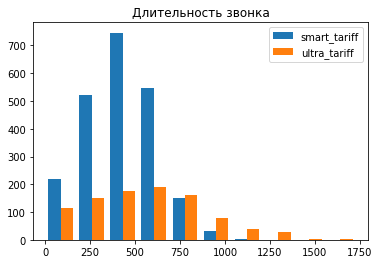

In [22]:
smart_tariff_d=smart_tariff['duration_count_sum']
ultra_tariff_d=ultra_tariff['duration_count_sum']
plt.hist([smart_tariff_d, ultra_tariff_d], label = ['smart_tariff', 'ultra_tariff'])
plt.legend()
plt.title('Длительность звонка')


<div class="alert alert-info">
<font color='black'> <b> Тариф "Смарт" и Тариф "Ультра" сообщения 
    
    Сравним исходные данные по тарифам и полученные значения по гистограммам :   
    Вывод по тарифу "Смарт"
    **Исходные данные: Включено 50 сообщений **
    Наибольшее количество пользователей почти не отправляет сообщения, но есть и много тех, кто превышает лимит тарифной сетки
    Вывод по тарифу "Ультра": 
    **Исходные данные: Включено 1000 сообщений**
    Наибольшее количество пользователей почти не отправляет сообщения, очень мало тех, кто доходит к значению тарифной сетки. График стремится к 0 уже при значениях в 200 сообщений 

Text(0.5, 1.0, 'Количество отправленных сообщений')

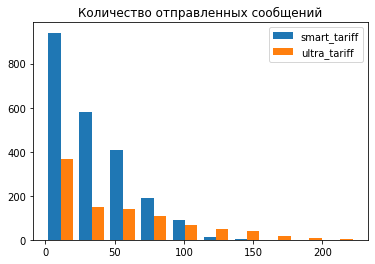

In [23]:
smart_tariff_m=smart_tariff['messages']
ultra_tariff_m=ultra_tariff['messages']
plt.hist([smart_tariff_m, ultra_tariff_m], label = ['smart_tariff', 'ultra_tariff'])
plt.legend()
plt.title('Количество отправленных сообщений')

<div class="alert alert-info">
<font color='black'> <b> Тариф "Смарт" и Тариф "Ультра" интернет 
    
     Сравним исходные данные по тарифам и полученные значения по гистограммам :   
    Вывод по тарифу "Смарт"
    **Исходные данные: 15 Гб интернет-трафика **
    Наибольшее количество пользователей превышает тарифный лимит по затраченному интернету в 15 Гб
    Вывод по тарифу "Ультра": 
    **Исходные данные: 30 Гб интернет-трафика**
    Наибольшее количество пользователей не превышает тарифный лимит по затраченному интернету в 30 Гб (пик около 20 Гб), но сравнительно много и тех, кто превышает лимит по интернету

Text(0.5, 1.0, 'Потрачено гигабайт интернета')

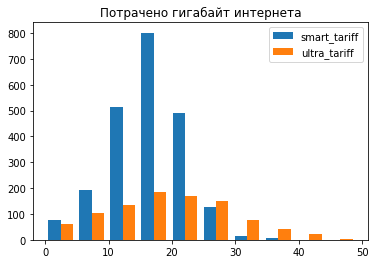

In [42]:
smart_tariff_i=smart_tariff['gb_used']
ultra_tariff_i=ultra_tariff['gb_used']
plt.hist([smart_tariff_i, ultra_tariff_i], label = ['smart_tariff', 'ultra_tariff'])
plt.legend()
plt.title('Потрачено гигабайт интернета')

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Очень хорошая практика писать промежуточные выводы</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> Все графики обязательно нужно сопроводить заголовками! <div class="alert alert-info"> <b>Комментарий студента:</b> Сделал   </div>

<div class="alert alert-success">
<b>2 Комментарий ревьюера ✔️:</b> Здорово! Кстати, если после plt.title() ставить знак точку с запятой, то техническая строка перед графиком скроется и он будет выглядеть ещё лучше :)

<div class="alert alert-warning">
<b>Комментарий ревьюера "пожелания":</b> Рекомендую сделать попарные гистограммы на одних осях, то есть построить совместные гистограммы для звонков на двух тарифах, для сообщений на двух тарифах и т.д. Такие гистограммы позволяют наглядно увидеть различия двух распределений.

Пример таких гистограмм есть в тренажере.<div class="alert alert-info"> <b>Комментарий студента:</b> Всё переделал   </div>


<div class="alert alert-success">
<b>2 Комментарий ревьюера ✔️:</b> Александр, круто, гистограммы получились очень наглядными.

 <div class="alert alert-info">
<font color='black'> <b> Выведем средние значения для тарифов, дисперсию и стандартное отклонение </font> <b>

In [25]:
variance = table_messages_calls_internet_month.pivot_table(index = ['tariff_name'], values = ['duration_count_sum', 'messages', 'gb_used'], aggfunc=['mean', 'var', 'std'])
display(variance)


mean                                      var  \
            duration_count_sum    gb_used   messages duration_count_sum   
tariff_name                                                               
smart               430.609987  16.329735  33.396311       37577.967083   
ultra               560.113565  19.487907  49.033649       99062.633405   

                                                   std                       
               gb_used     messages duration_count_sum   gb_used   messages  
tariff_name                                                                  
smart        33.092396   798.595792         193.850373  5.752599  28.259437  
ultra        97.820643  2198.733603         314.742170  9.890432  46.890656

 <div class="alert alert-info">
<font color='black'> <b> Из расчета видно, что по тарифу "Smart" пользователи частенько превышают лимиты по всем категориям связи, пользователи "Ultra" - наооборот, разве что по количеству мегабайт возможно редкое превышение лимита </font> <b>

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Совершенно верный расчет и вывод.</div>


## Гипотезы

<div class="alert alert-info">
<font color='black'> <b> Проверим, отличается ли средняя выручка пользователей тарифов "Смарт" и "Ультра"</font> <b>

 <div class="alert alert-info">
<font color='black'> <b> Сформулируем гипотезы: 1. Ho - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны  2. H1 -   средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</font> <b>

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> В общем виде формулировки верны, но нужно в данном случае сделать конкретные формулировки. Пример:
<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал   </div>
    
    Н0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны, т.е. средние значения равны.

    Н1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, т.е. средние значения не равны. 
    
    

<div class="alert alert-success">
<b>2 Комментарий ревьюера:</b>  👍 👏 </div>

In [26]:
smart = smart_tariff['profit']
ultra = ultra_tariff['profit']

display(smart.mean())
display(ultra.mean())

alpha = .05

results = st.ttest_ind(
    smart, 
    ultra)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

1307.9127305443094

2070.9779179810726

'p-значение:'

9.508492042148251e-147

'Отвергаем нулевую гипотезу'

 <div class="alert alert-info">
<font color='black'> <b> Вывод: Средняя выручка по двум тарифам сильно различается. Судя по средней выручке, тариф "Ultra" приносит больше прибыли</font> <b>

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> Верно!</div>

<div class="alert alert-info">
<font color='black'> <b> Проверим, отличается ли выручка по Москве и по другим городам</font> <b>

 <div class="alert alert-info">
<font color='black'> <b> Сформулируем гипотезы: 1. Ho - средняя выручка пользователей Москвы и других регионов равны  2. H1 -   средняя выручка пользователей Москвы и других регионов различаются</font> <b>

<div class="alert alert-danger">
<b>Комментарий ревьюера "ошибка":</b> Добавь, пожалуйста, полные формулировки гипотез. 
    <div class="alert alert-info"> <b>Комментарий студента:</b> Сделал   </div>

<div class="alert alert-success">
<b>2 Комментарий ревьюера:</b>  👍 👏

In [27]:
moscow_tariff = table_messages_calls_internet_month.query('city == "Москва"')
other_tariff = table_messages_calls_internet_month.query('city != "Москва"')

moscow_profit = moscow_tariff['profit']
other_profit = other_tariff['profit']

display(moscow_profit.mean())
display(other_profit.mean())

alpha = .05

results = st.ttest_ind(
    moscow_profit, 
    other_profit)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

1555.8295081967212

1531.955538221529

'p-значение:'

0.5096565401264077

'Не получилось отвергнуть нулевую гипотезу'

 <div class="alert alert-info">
<font color='black'> <b> Вывод: выручка по Москве и остальным городам сильно не отличается</font> <b>

<div class="alert alert-success">
<b>Комментарий ревьюера "хорошее решение":</b> да, всё так!</div>

 <div class="alert alert-info">
<font color='black'> <b> ОБЩИЙ ВЫВОД:  Тариф Smart приносит больше дохода,  чем тариф Ultra. По тарифу Smart пользователи часто превышают лимиты тарифной сетки по всем категориям связи, по тарифу Ultra такого не наблюдается. Несмотря на то, что больше прибыли приносит тариф Smart, среднняя выручка выше у Ultra. Разница в средней выручки из Москвы и других регионов сильно не отличается</font> <b>

<div style="border:solid purple 2px; padding: 20px"> 
Александр, у тебя оригинальная работа. В первом разделе ты использовал неоптимальный алгоритм расчета помесячной выручки, но видно, что ты хорошо понимаешь, что делаешь, и правильно интерпретируешь полученные разультаты. Ошибки в расчетах не сильно исказили результат и твои выводы логичны и обоснованы.
    Тем не менее, есть ряд недочетов, которые нужно исправить, чтобы я могла принять твою работу:
    
    - Добавь, пожалуйста, небольшое введение и больше заголовков. Так будет намного удобнее и мне проверять твою работу, и тебе в ней ориентироваться (я сама добавила парочку);
    - нужно сделать округление длительности каждого звонка до целых минут и помесячного трафика до целых Гб;
    - желательно проверить,куда подевались несколько пользователей, а в идеале пересобрать общую таблицу по более оптимальному алгоритму (этот пункт на твое усмотрение, если время поджимает, я не буду настаивать);
    - сопроводить все графики заголовками (обязательно) и сделать попарные гистограммы на одних осях (желательно);
    - добавить формулировку гипотез.
    
    
 С нетерпением жду твой проект на повторную проверку!

<div style="border:solid purple 2px; padding: 20px"> 
    <b>Комментарий ревьюера v2:</b>
Александр, спасибо за доработки! Твой крик души я услышала и не буду настаивать на том, чтобы ты снова погрузился в таблицы этого проекта для поиска потерянных смс и звонков :) Я вижу, что ты свободно владеешь инструментами python, верно интерпретируешь полученные данные и графики и пишешь ясные и обоснованные выводы, а это самое главное в работе аналитика.      

Держись, впереди будет ещё много сложных проектов (особенно А/В тесты), это не повод отчаиваться! Первая часть курса пройдена, удачи со сборным проектом!